# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectKBest

from matplotlib import pyplot as plt
import seaborn as sns

import pickle 

In [3]:
df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [24]:
df.Credit_History.value_counts()

1.0    475
0.0    139
Name: Credit_History, dtype: int64

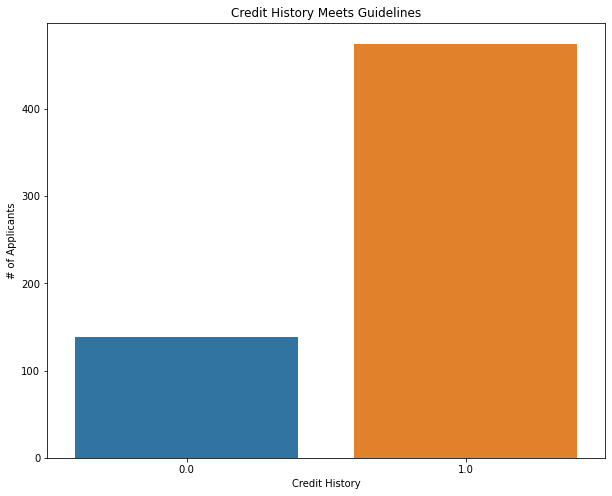

In [109]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.barplot(x=df.Credit_History.value_counts().index, y=df.Credit_History.value_counts().values)
plt.xlabel('Credit History')
plt.ylabel('# of Applicants')
plt.title('Credit History Meets Guidelines')
plt.savefig('CreditHistory.jpg')
plt.show()

In [26]:
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

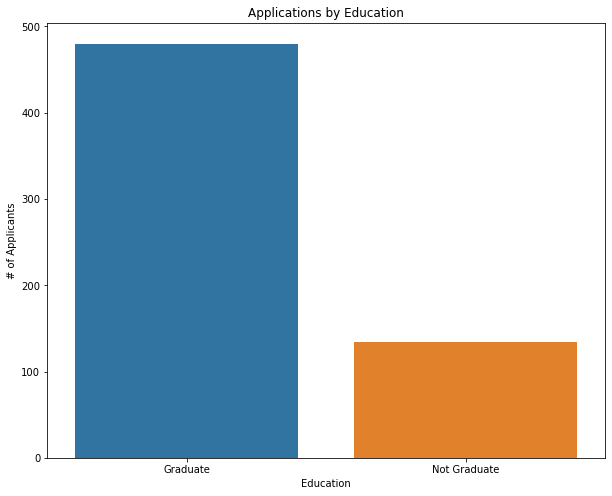

In [149]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.barplot(x=df.Education.value_counts().index, y=df.Education.value_counts().values)
plt.xlabel('Education')
plt.ylabel('# of Applicants')
plt.title('Applications by Education')
plt.savefig('CreditHistory.jpg')
plt.show()

In [25]:
df.Gender.value_counts()['Male']

502

In [9]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [12]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [14]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

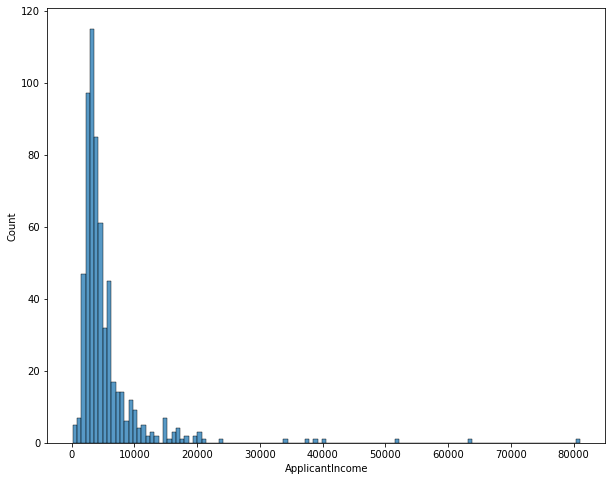

In [53]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.histplot(df['ApplicantIncome'])

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

<AxesSubplot:ylabel='Count'>

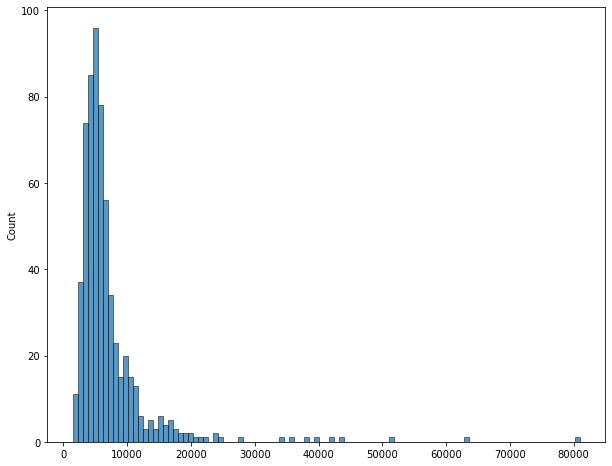

In [72]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
sns.histplot(df['ApplicantIncome'] + df['CoapplicantIncome'])

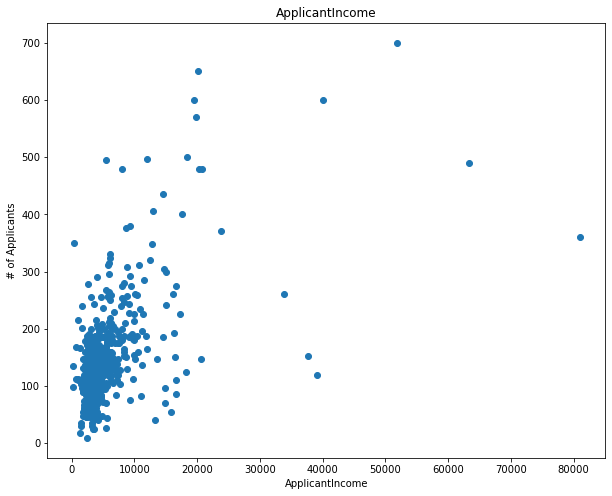

In [59]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_title('ApplicantIncome')
ax.set_xlabel('ApplicantIncome')
ax.set_ylabel('# of Applicants')
ax.scatter(x=df['ApplicantIncome'], y=df['LoanAmount'])
fig.savefig('Income_Loan_Scatter.jpg')

In [88]:
df.ApplicantIncome.skew()

6.539513113994625

In [85]:
df.CoapplicantIncome.astype('int64').skew()

7.491529631159513

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



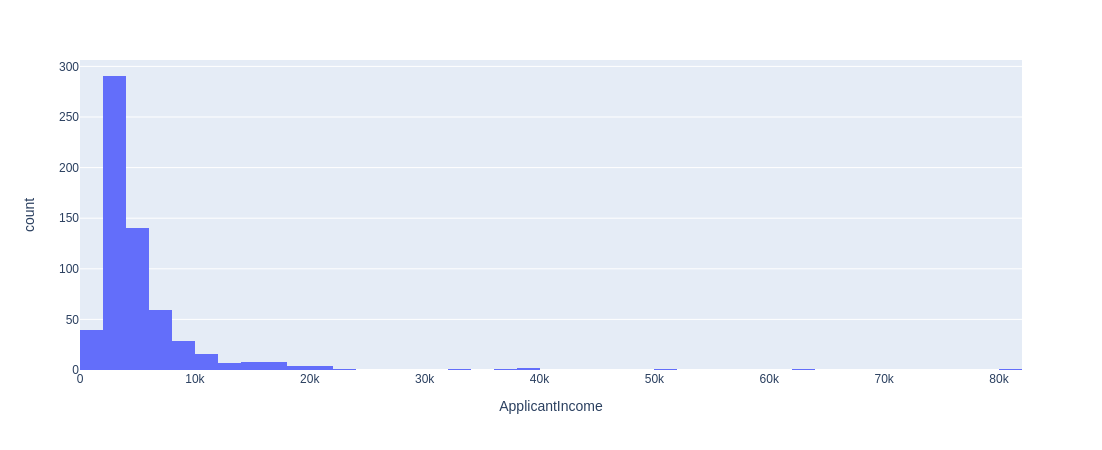

In [63]:
import plotly.express as px
fig = px.histogram(df, x="ApplicantIncome",nbins=50)
fig.show()

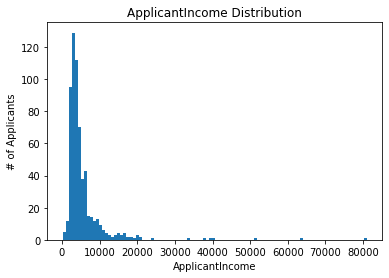

In [160]:
plt.hist(df['ApplicantIncome'], bins=100)
plt.xlabel('ApplicantIncome')
plt.ylabel('# of Applicants')
plt.title('ApplicantIncome Distribution')
#plt.savefig('CreditHistory.jpg')
plt.show()

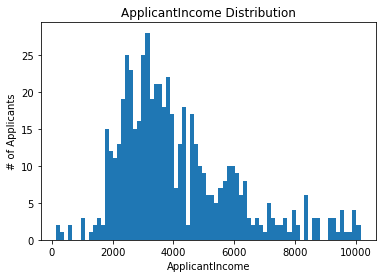

In [162]:
# get rid of outliers
IQR = (df['ApplicantIncome'].quantile(0.75)-df['ApplicantIncome'].quantile(0.25))
lower_outlier = df['ApplicantIncome'].quantile(0.25) - 1.5*IQR
upper_outlier = df['ApplicantIncome'].quantile(0.75) + 1.5*IQR
df2 = df[(df['ApplicantIncome'] < upper_outlier) & (df['ApplicantIncome'] > lower_outlier)]
plt.hist(df2['ApplicantIncome'], bins=75)
plt.xlabel('ApplicantIncome')
plt.ylabel('# of Applicants')
plt.title('ApplicantIncome Distribution')
#plt.savefig('CreditHistory.jpg')
plt.show()


Look at box plots to understand the distributions. 

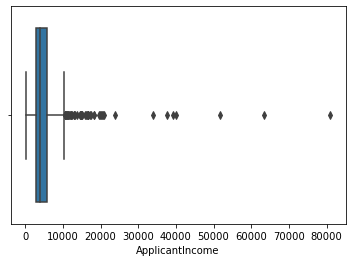

In [64]:
ax = sns.boxplot(x="ApplicantIncome", data=df)

Look at the distribution of income segregated  by `Education`

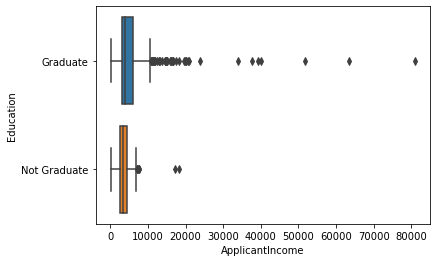

In [65]:
ax = sns.boxplot(x="ApplicantIncome", y="Education", data=df)

Look at the histogram and boxplot of LoanAmount

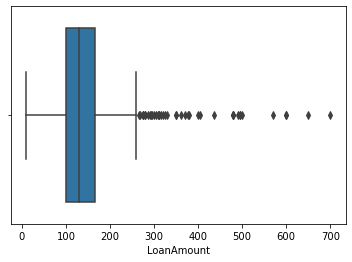

In [107]:
ax = sns.boxplot(x="LoanAmount", data=df)

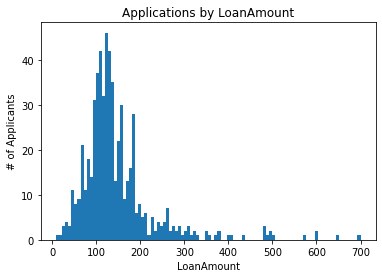

In [5]:
#ax = sns.boxplot(x="LoanAmount", data=df)
plt.hist(df['LoanAmount'], bins=100)
plt.xlabel('LoanAmount')
plt.ylabel('# of Applicants')
plt.title('Applications by LoanAmount')
#plt.savefig('CreditHistory.jpg')
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [18]:
pd.pivot_table(df, values = 'LoanAmount', index=['Education', 'Property_Area', 'Married'], columns='Loan_Status',aggfunc=np.count_nonzero)

Loan_Status                            N      Y
Education    Property_Area Married             
Graduate     Rural         No       18.0   28.0
                           Yes      29.0   56.0
             Semiurban     No       21.0   44.0
                           Yes      22.0  100.0
             Urban         No       23.0   37.0
                           Yes      27.0   75.0
Not Graduate Rural         No        7.0   10.0
                           Yes      15.0   16.0
             Semiurban     No        3.0   14.0
                           Yes       8.0   21.0
             Urban         No        7.0    4.0
                           Yes      12.0   17.0

In [106]:
pd.pivot_table(df, values = 'ApplicantIncome', index=['Education'], columns='Loan_Status',aggfunc=np.mean)

Loan_Status,N,Y
Education,,
Graduate,6114.514286,5751.576471
Not Graduate,3646.442308,3860.256098


In [142]:
table = pd.pivot_table(df, values = 'ApplicantIncome', index=['Credit_History'], columns='Loan_Status',aggfunc=np.count_nonzero)
table['Approval %'] = (table.Y / (table.Y + table.N) * 100).astype(float) 

In [11]:
table

Loan_Status,N,Y,Approval %
LoanRange,,,
$0-200,161.0,373.0,69.850187
$200-400,27.0,39.0,59.090909
$400-600,4.0,8.0,66.666667
$600+,NaN,2.0,NaN


In [10]:
table = pd.pivot_table(df, values = 'ApplicantIncome', index=['LoanRange'], columns='Loan_Status',aggfunc=np.count_nonzero)
table['Approval %'] = (table.Y / (table.Y + table.N) * 100).astype(float) 

In [157]:
df['IncomeRange'] = pd.cut(df['ApplicantIncome'], [0, 5000, 10000, 15000], labels=['$0-5000', '$5000-10000', '$15000+'])

In [9]:
df['LoanRange'] = pd.cut(df['LoanAmount'], [0, 200, 400, 600, 800], labels=['$0-200', '$200-400', '$400-600', '$600+'])

In [153]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [19]:
pd.pivot_table(df, values = 'LoanAmount', index=['Gender', 'Education'], columns='Loan_Status',aggfunc=np.count_nonzero)

Loan_Status              N      Y
Gender Education                 
Female Graduate       31.0   61.0
       Not Graduate    6.0   14.0
Male   Graduate      109.0  279.0
       Not Graduate   46.0   68.0

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [15]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
def fillna(df):
    df['Gender'].fillna('Male', inplace=True)
    df['Married'].fillna('No', inplace=True)
    df['Dependents'].fillna(0, inplace=True)
    df['Dependents'] = df['Dependents'].replace('3+',3)
    df['Self_Employed'].fillna('No', inplace=True)
    df['Credit_History'].fillna(0.0, inplace=True)
    df['LoanAmount'].fillna(df.LoanAmount.mean(), inplace=True)
    df['Loan_Amount_Term'].fillna(df.Loan_Amount_Term.median(), inplace=True)
    return df

In [7]:
fillna(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [19]:
df[df.Gender.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [20]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [30]:
def encode(df):
    # creating instance of labelencoder
    labelencoder = LabelEncoder()
    # Assigning numerical values and storing in another column
    df.Gender = labelencoder.fit_transform(df.Gender)
    df.Married = labelencoder.fit_transform(df.Married)
    df.Dependents = labelencoder.fit_transform(df.Dependents)
    df.Education = labelencoder.fit_transform(df.Education)
    df.Self_Employed = labelencoder.fit_transform(df.Self_Employed)
    df.Property_Area = labelencoder.fit_transform(df.Property_Area)
    df.Loan_Status = labelencoder.fit_transform(df.Loan_Status)
    df.head
    return df

In [55]:
encode(df)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [22]:
df.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

Combine both incomes as total income and take a log transformation of the same.

## 4. Building a Predictive Model

In [5]:
X = df.drop(columns=['Loan_ID','Loan_Status'])
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25)

In [12]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
394,1,1,2,0,0,3100,1400.0,113.0,360.0,1.0,2
240,1,1,2,0,0,5819,5000.0,120.0,360.0,1.0,0
598,1,1,0,0,1,9963,0.0,180.0,360.0,1.0,0
34,1,0,3,0,0,12500,3000.0,320.0,360.0,1.0,0
143,1,1,0,0,0,2698,2034.0,122.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
205,0,0,0,1,0,4408,0.0,120.0,360.0,1.0,1
329,0,0,0,0,0,2500,0.0,67.0,360.0,1.0,2
563,1,0,0,1,1,5800,0.0,132.0,360.0,1.0,1
343,1,1,3,1,0,3173,0.0,74.0,360.0,1.0,1


Try paramater grid search to improve the results

In [23]:
df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome',
            'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [31]:
class preprocess:

    def __init__(self):
        # Your __init__ function takes in arguments as input
        # and does some initialization, such as creating model parameters.
        print('init() called')
        pass

    def fit(self, X, y = None):
        # Your forward() function takes in an X (and optionally a y)
        # and fits its parameters to the data. It then returns "self".
        # This transformer does not fit anything, because it is parameterless.
        print('fit() called')
        return self

    def transform(self, df, y = None):
        # Your transform() function takes in an X (and optionally a y)
        # and spits out the transformed output.
        # This transformer returns the original features and their nth root.
        
        
       # creating instance of labelencoder
        labelencoder = LabelEncoder()
        # Assigning numerical values and storing in another column
        df.Gender = labelencoder.fit_transform(df.Gender)
        df.Married = labelencoder.fit_transform(df.Married)
        df.Dependents = labelencoder.fit_transform(df.Dependents)
        df.Education = labelencoder.fit_transform(df.Education)
        df.Self_Employed = labelencoder.fit_transform(df.Self_Employed)
        df.Property_Area = labelencoder.fit_transform(df.Property_Area)
        #df.Loan_Status = labelencoder.fit_transform(df.Loan_Status)
        df.head
        return df
        
        print('transform() called')
        return df

In [32]:
pipeline = Pipeline(steps=[('preprocess', preprocess()),
                           ('scaling', StandardScaler()), 
                           ('classifier', LogisticRegression())])
pipeline.fit(X_train, y_train)

init() called
fit() called


/home/aj/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Pipeline(steps=[('preprocess', <__main__.preprocess object at 0x7fd1e465eee0>),
                ('scaling', StandardScaler()),
                ('classifier', LogisticRegression())])

In [48]:
pipeline = Pipeline(steps=[('scaling', StandardScaler()), 
                           ('classifier', LogisticRegression())])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('classifier', LogisticRegression())])

In [33]:
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {acc}')

Test set accuracy: 0.7792207792207793


/home/aj/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [26]:
feature_union = FeatureUnion([('pca', PCA(n_components=3)), 
                              ('select_best', SelectKBest(k=6))])

pipeline = Pipeline(steps=[('scaling', StandardScaler()),
                           ('features', feature_union),
                           ('classifier', RidgeClassifier())])

# Find the best hyperparameters using GridSearchCV on the train set
param_grid = {'classifier__alpha': [0.001, 0.01, 0.1], 
              'features__pca__n_components': [2, 3, 4, 5],
              'features__select_best__k': [1, 2, 3, 4, 5]}
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.8246753246753247
Achieved with hyperparameters: {'classifier__alpha': 0.001, 'features__pca__n_components': 2, 'features__select_best__k': 2}


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [49]:
with open('model.p', 'wb') as f:
    pickle.dump(pipeline, f)

In [1]:
import json
import requests
import os
from IPython.display import JSON

In [56]:
import requests
URL = "http://127.0.0.1:5000/approval"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data)

In [99]:
import requests
URL = "http://ec2-3-141-194-46.us-east-2.compute.amazonaws.com:5554/approval"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data)

In [100]:
print(r.json())

['N']


In [73]:
# import Flask and jsonify
from flask import Flask, jsonify, request

In [64]:
json_data = X_test.head(1).to_dict(orient='records')[0]

In [98]:
json_data = {'Gender': 'Female', 'sfdf': 'f',
 'Married': 'Yes',
 'Dependents': '3',
 'Education': 'Graduate',
 'Self_Employed': 'Yes',
 'ApplicantIncome': 849,
 'CoapplicantIncome': 0.0,
 'LoanAmount': 14.16,
 'Loan_Amount_Term': 160.0,
 'Credit_History': 0.0,
 'Property_Area': 'Rural'}

In [51]:
model = pickle.load( open( "model.p", "rb" ) )


In [52]:
model

Pipeline(steps=[('preprocess', <__main__.preprocess object at 0x7f6cbce5c430>),
                ('scaling', StandardScaler()),
                ('classifier', LogisticRegression())])

In [40]:
df2 = pd.DataFrame(json_data.values(), index=json_data.keys()).transpose()


In [67]:
model.predict(json_data)

AttributeError: 'dict' object has no attribute 'Gender'

In [44]:
X.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2


In [26]:
json_data

{'Gender': 1,
 'Married': 0,
 'Dependents': 0,
 'Self_Employed': 0,
 'ApplicantIncome': 5849,
 'CoapplicantIncome': 0.0,
 'LoanAmount': 146.41216216216216,
 'Loan_Amount_Term': 360.0,
 'Credit_History': 1.0,
 'Property_Area': 2}

In [55]:
df3 = pd.DataFrame(json_data.values(), index=json_data.keys()).transpose()


In [101]:
pipeline.predict(X_test.head(1))


array(['N'], dtype=object)